In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# importando a base de dados 
carcrash = pd.read_csv('C:/Users/bruna.cremonini/Downloads/train-new.csv')
carcrash.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3
1,25-39,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,76:40:1,3
2,55+,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,11:184:1,3
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,9:17:1,3
4,10-24,27.751,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,2:2:2,0


In [4]:
## _______ descrições gerais:

# tamanho da base
carcrash.shape

(17565, 15)

In [5]:
# descrições numéricas
carcrash.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000
mean,458.763017,0.643439,37.212411,1999.558497,1992.843894,0.340165,1.713066
std,1471.148421,0.478997,17.945232,1.702162,5.568838,0.473778,1.290565
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,32.264000,0.000000,22.000000,1998.000000,1989.000000,0.000000,1.000000
50%,86.986000,1.000000,33.000000,2000.000000,1994.000000,0.000000,2.000000
75%,357.283000,1.000000,48.000000,2001.000000,1997.000000,1.000000,3.000000
max,57871.595000,1.000000,97.000000,2002.000000,2003.000000,1.000000,6.000000


In [6]:
# tipo do dado
carcrash.dtypes

dvcat           object
weight         float64
dead            object
airbag          object
seatbelt        object
frontal          int64
sex             object
ageOFocc         int64
yearacc          int64
yearVeh          int64
abcat           object
occRole         object
deploy           int64
caseid          object
injSeverity      int64
dtype: object

In [7]:
## _______ verificando e entendendo os dados:
# se há dados vazios
carcrash.isnull().sum()

dvcat          0
weight         0
dead           0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
caseid         0
injSeverity    0
dtype: int64

In [8]:
# se temos dados duplicados:
carcrash[carcrash.duplicated()]

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity


In [9]:
# buscando algum tipo de erro:
carcrash.nunique() # temos registro de 8236 batidas de carros.

dvcat             5
weight         8406
dead              2
airbag            2
seatbelt          2
frontal           2
sex               2
ageOFocc         82
yearacc           6
yearVeh          44
abcat             3
occRole           2
deploy            2
caseid         8236
injSeverity       7
dtype: int64

In [11]:
carcrash['caseid'].value_counts().max() # temos até 8 pessoas envolvidas em um acidente

8

In [21]:
carcrash[carcrash['occRole']=='driver']['caseid'].value_counts().max() # temos até 6 carros envolvidos em um acidente

6

In [76]:
carcrash['ageGroup']=pd.cut(carcrash['ageOFocc'], 
                            bins=[0,18,25,35,45,55,65,100], 
                            labels=['<=18','(18-25]','(25-35]','(35,45]','(45,55]','(55-65]','>65'])

carcrash.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity,ageGroup
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3,"(45,55]"
1,25-39,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,76:40:1,3,(25-35]
2,55+,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,11:184:1,3,"(45,55]"
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,9:17:1,3,(25-35]
4,10-24,27.751,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,2:2:2,0,(25-35]


In [92]:
## _______ testando se motoristas mulheres morrem mais do que motoristas homens:

# criando um dataset apenas de motoristas
df_drivers1 = carcrash[carcrash['occRole']=='driver']

# entendendo a distribução de sexo entre os motoristas
df_drivers1['sex'].value_counts(normalize=True)

m    0.558615
f    0.441385
Name: sex, dtype: float64

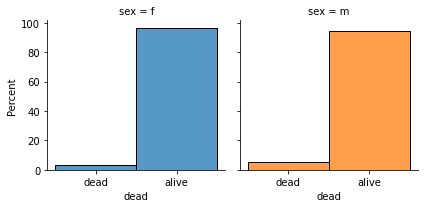

In [100]:
# comparação entre mortos e sobreviventes:

grid = sns.FacetGrid(df_drivers1, col='sex',hue='sex')
grid.map(sns.histplot, 'dead', stat='percent')
plt.show()

In [59]:
# total de homens e mulheres entre os motoristas
df_drivers1['sex'].value_counts()

m    7710
f    6092
Name: sex, dtype: int64

In [93]:
#distribuição de morte entre motoristas mulheres 
df_drivers1[df_drivers1['sex']=='f'].groupby(["sex",'dead'])['dead'].count()/60,92 

(sex  dead 
 f    alive    98.383333
      dead      3.150000
 Name: dead, dtype: float64,
 92)

In [94]:
#distribuição de morte entre motoristas homens
df_drivers1[df_drivers1['sex']=='m'].groupby(["sex",'dead'])['dead'].count()/77,10

(sex  dead 
 m    alive    94.883117
      dead      5.246753
 Name: dead, dtype: float64,
 10)

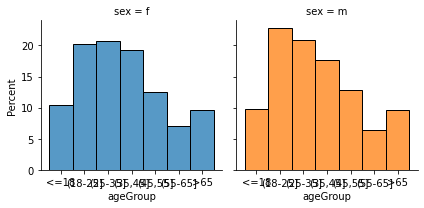

In [95]:
# comportamento em faixas etárias

grid = sns.FacetGrid(df_drivers1, col='sex',hue='sex')
grid.map(sns.histplot, 'ageGroup', stat='percent')
plt.show()

In [97]:
#distribuição de morte entre motoristas mulheres 
df_drivers1[df_drivers1['sex']=='f'].groupby(["sex",'ageGroup'])['ageGroup'].count()/60,92 

(sex  ageGroup
 f    <=18        10.550000
      (18-25]     20.616667
      (25-35]     21.083333
      (35,45]     19.600000
      (45,55]     12.766667
      (55-65]      7.133333
      >65          9.783333
 Name: ageGroup, dtype: float64,
 92)

In [98]:
#distribuição de morte entre motoristas homens
df_drivers1[df_drivers1['sex']=='m'].groupby(["sex",'ageGroup'])['ageGroup'].count()/77,10

(sex  ageGroup
 m    <=18         9.727273
      (18-25]     22.922078
      (25-35]     20.935065
      (35,45]     17.675325
      (45,55]     12.831169
      (55-65]      6.415584
      >65          9.623377
 Name: ageGroup, dtype: float64,
 10)

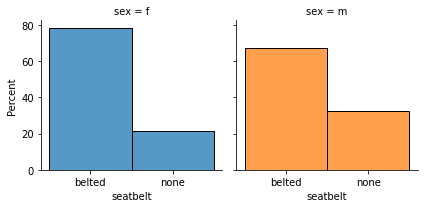

In [110]:
## _______ testando se mulheres usam mais cinto de segurança do que homens:
grid = sns.FacetGrid(df_drivers1, col='sex',hue='sex')
grid.map(sns.histplot, 'seatbelt', stat='percent')
plt.show()

In [108]:
# uso de cinto entre motoristas mulheres 
df_drivers1[df_drivers1['sex']=='f'].groupby(["sex",'seatbelt'])['seatbelt'].count()/60,92

(sex  seatbelt
 f    belted      79.833333
      none        21.700000
 Name: seatbelt, dtype: float64,
 92)

In [109]:
#uso de cinto entre motoristas homens
df_drivers1[df_drivers1['sex']=='m'].groupby(["sex",'seatbelt'])['seatbelt'].count()/77,10

(sex  seatbelt
 m    belted      67.38961
      none        32.74026
 Name: seatbelt, dtype: float64,
 10)

Motoristas mulheres usam mais cinto de segurança do que motoristas homens (18%).

In [119]:
# __________ avaliando a velocidade em que os motoristas dirigiam

# melhorando a leitura do campo 'dvcat':
# criando um DataFrame para atribuição:
dfApoio = pd.DataFrame({'dvcat': ['1-9km/h','10-24','25-39','40-54','55+'], 
                   'speed': ['1','2','3','4','5']})
#df_drivers1['dvcat'].value_counts()
print(dfApoio)

     dvcat speed
0  1-9km/h     1
1    10-24     2
2    25-39     3
3    40-54     4
4      55+     5


In [122]:
# usando .merge a partir da chave 'dvcat':
df_drivers2 = pd.merge(df_drivers1,dfApoio, on='dvcat') 
df_drivers2.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity,ageGroup,speed
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3,"(45,55]",5
1,55+,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,11:184:1,3,"(45,55]",5
2,55+,83.896,alive,airbag,belted,1,m,24,2002,2002,deploy,driver,1,47:132:1,3,(18-25],5
3,55+,89.920,alive,none,none,1,m,19,1997,1990,unavail,driver,0,13:134:1,3,(18-25],5
4,55+,46.257,alive,airbag,belted,1,f,39,1999,1994,deploy,driver,1,45:189:2,3,"(35,45]",5


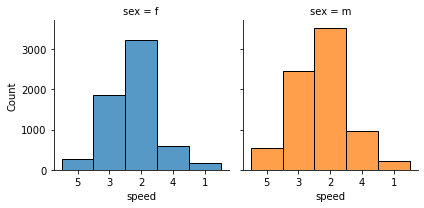

In [134]:
# comparando graficamente
grid = sns.FacetGrid(df_drivers2, col='sex',hue='sex')
grid.map(sns.histplot,'speed')
plt.show()

In [124]:
#distribuição de velocidade entre motoristas mulheres 
df_drivers2[df_drivers2['sex']=='f'].groupby(["sex",'speed'])['speed'].count()/60,92 

(sex  speed
 f    1         2.700000
      2        53.683333
      3        30.866667
      4         9.950000
      5         4.333333
 Name: speed, dtype: float64,
 92)

In [125]:
#distribuição de velocidade entre motoristas homens 
df_drivers2[df_drivers2['sex']=='m'].groupby(["sex",'speed'])['speed'].count()/77,10

(sex  speed
 m    1         2.701299
      2        45.948052
      3        32.000000
      4        12.415584
      5         7.064935
 Name: speed, dtype: float64,
 10)

In [135]:
dfApoio

,dvcat,speed
0,1-9km/h,1
1,10-24,2
2,25-39,3
3,40-54,4
4,55+,5
